# Time series forecasting

# Initial setup

## Import required packages

In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [135]:
data = pd.read_csv('UNRATE.csv', header = None)
data.head()

,0,1
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [136]:
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m-%d')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6
1948-07-01,3.6
1948-08-01,3.9
1948-09-01,3.8


# Time series analysis

## Plot time series data

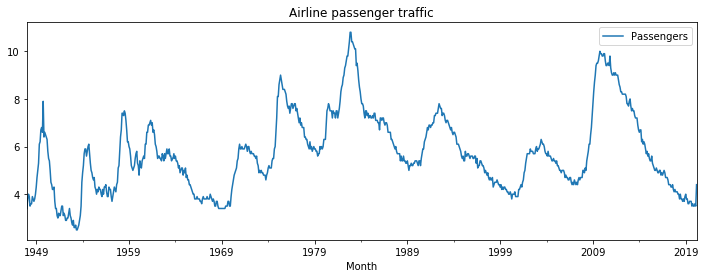

In [137]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

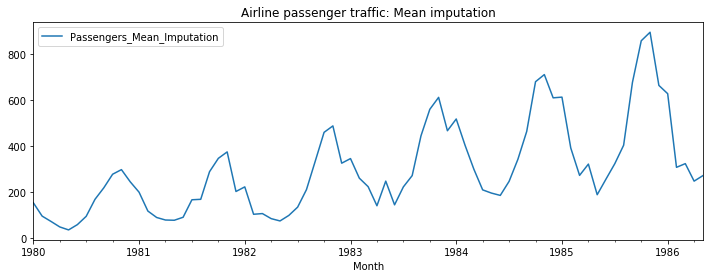

In [21]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

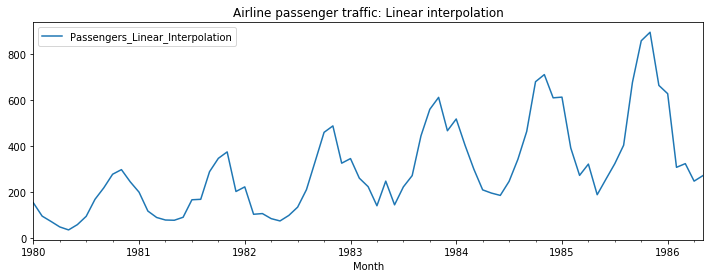

In [22]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [23]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

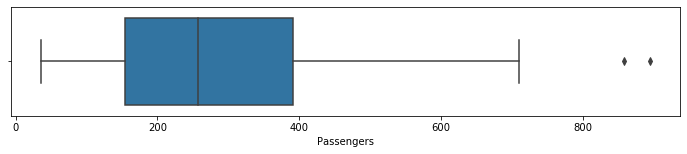

In [24]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

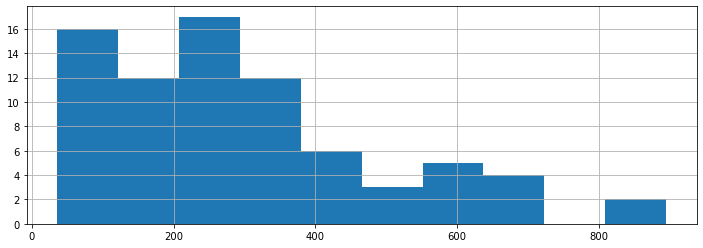

In [25]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

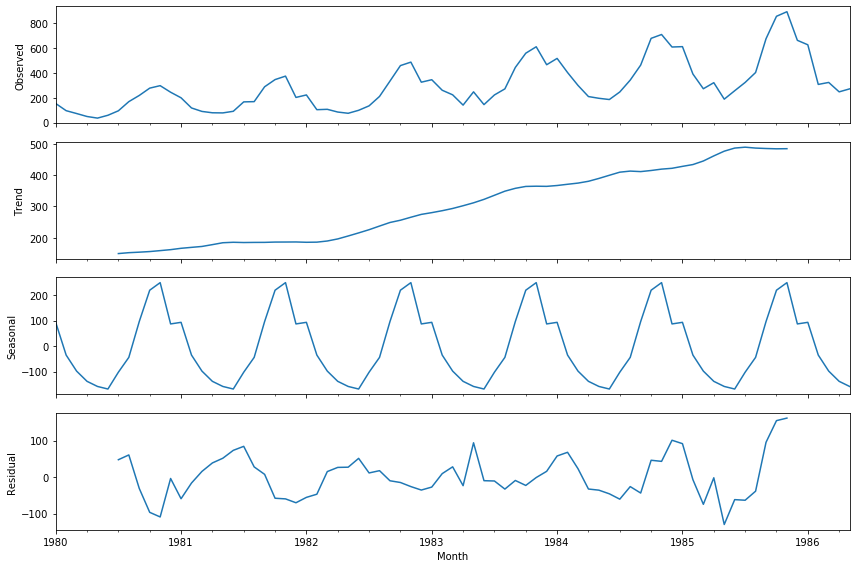

In [26]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

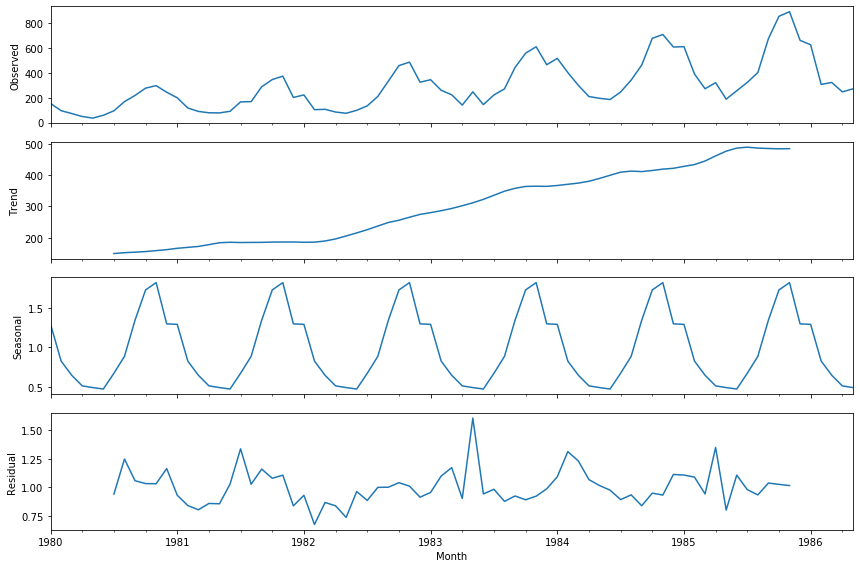

In [27]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [138]:
train_len = 612
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [29]:
train.tail()

,Passengers
Month,
1984-09-01,464
1984-10-01,680
1984-11-01,711
1984-12-01,610
1985-01-01,613


# Simple time series methods

## Naive method

In [30]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

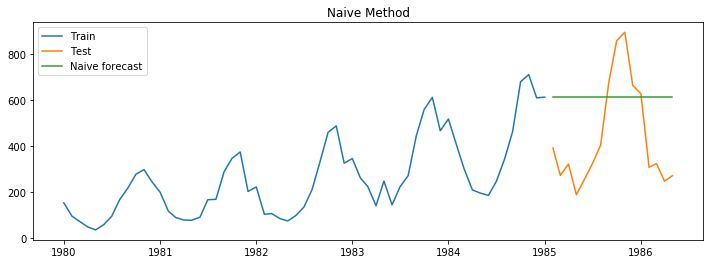

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21


## Simple average method

In [33]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

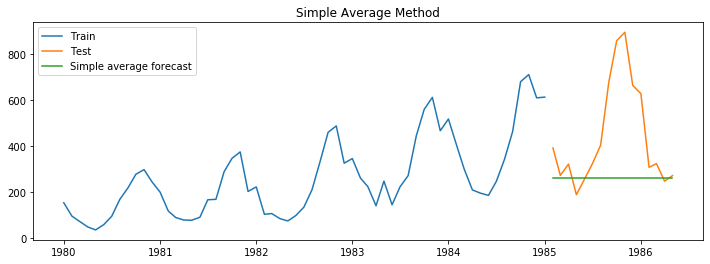

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02


## Simple moving average method

In [36]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

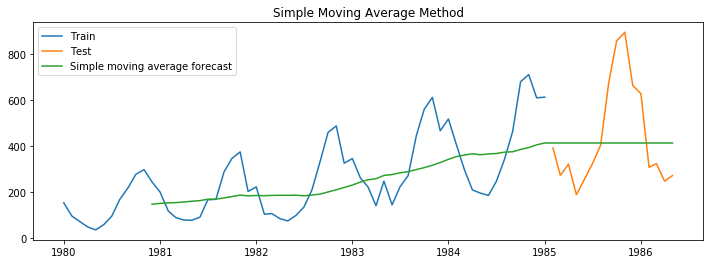

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [38]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29


# Exponential smoothing methods

## Simple exponential smoothing

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

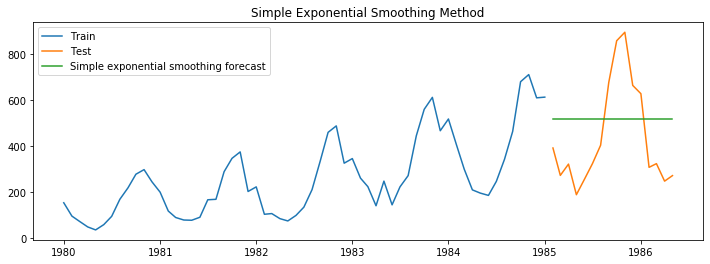

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49


## Holt's method with trend

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 154.0, 'initial_slope': -58.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

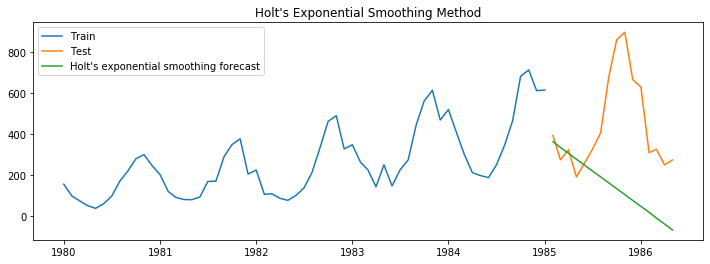

In [43]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [44]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49
0,Holt's exponential smoothing method,401.11,65.10


## Holt Winters' additive method with trend and seasonality

In [47]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(16)

{'smoothing_level': 0.10526315789473684, 'smoothing_slope': 0.052567776847561774, 'smoothing_seasonal': 0.894736842105263, 'damping_slope': nan, 'initial_level': 342.0029672215884, 'initial_slope': 3.946549244761143, 'initial_seasons': array([-188.31042902, -246.31940446, -269.32132727, -293.32292196,
       -306.32895851, -283.33983912, -247.34937552, -173.37246682,
       -123.37715565,  -64.40298474,  -44.4292372 ,  -97.45628701]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

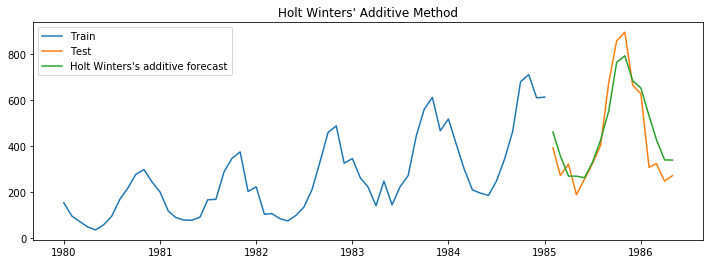

In [48]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49
0,Holt's exponential smoothing method,401.11,65.10
0,Holt Winters' additive method,90.63,20.73


## Holt Winter's multiplicative method with trend and seasonality

In [50]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.631578947368421, 'damping_slope': nan, 'initial_level': 342.3333333333333, 'initial_slope': 3.0208333333333326, 'initial_seasons': array([0.44985394, 0.28042843, 0.21324245, 0.14313535, 0.10516066,
       0.17234664, 0.2775073 , 0.49367089, 0.63972736, 0.812074  ,
       0.87049659, 0.71567673]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


ValueError: Length of values does not match length of index

### Plot train, test and forecast

KeyError: 'hw_forecast'

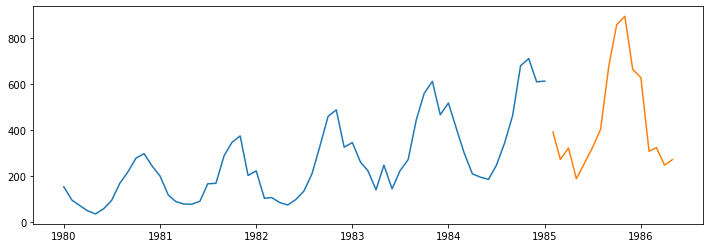

In [51]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

KeyError: 'hw_forecast'

# Course 2 - Timeseries forecasting

#### Stationary versus Non - Stationary Time Series

#### Timeseries Plot

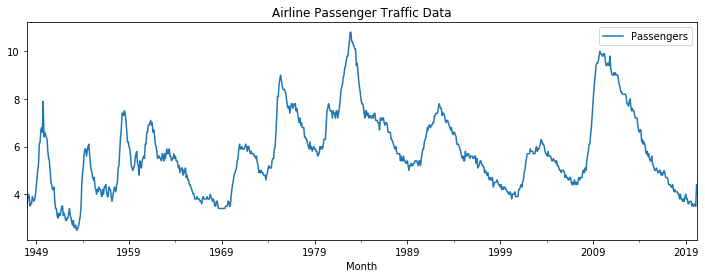

In [139]:
data['Passengers'].plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show()

### Augmented Dicky Fuller (ADF) Test

NULL Hypothesis: Series is not stationary

In [140]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -3.143963
Critical Value @ 0.05: -2.86
p-value: 0.023466


### KPSS test

NULL Hypothesis: Series is stationary

In [141]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic %f' %kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS Statistic 0.464446
Critical Value @ 0.05: 0.46
p-value 0.049674


Since p-value is less than critical value, we reject the NULL hypothesis. We reject the hypothesis that the series is stationary.

Hence, we don't have enough proof to prove the NULL hypothesis, so the ALTERNATE hypothesis hold good.


ALTERNATE Hypothesis: The series is not stationary

### Box-cox Transformation

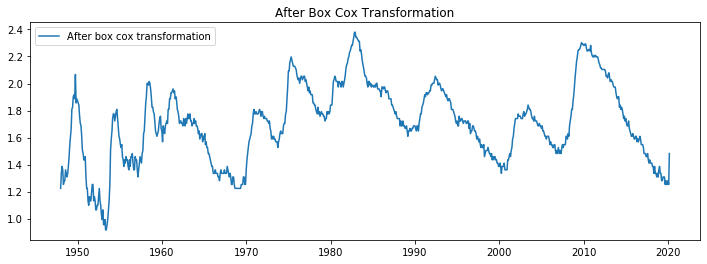

In [142]:
# box-cox is a power transformation tool
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda = 0), index = data.index)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox, label = 'After box cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')
plt.show()

### Differencing

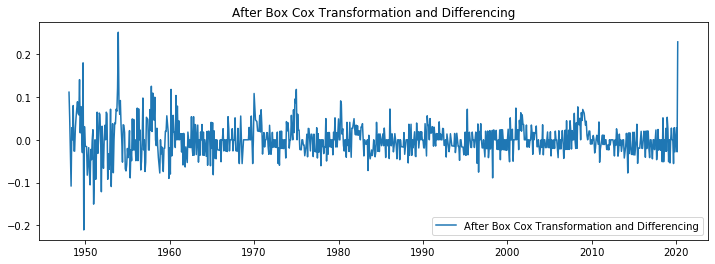

In [143]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace = True)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transformation and Differencing')
plt.show()

### ADF Test after Box Cox Transformation and Differencing

NULL Hypothesis: The Series is NOT stationary

In [144]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -8.918955
Critical Value @ 0.05: -2.86
p-value: 0.000000


The p-value is 0.01, which is less than 0.05. Hence, we can reject the NULL hypothesis. 

The ALTERNATE Hypothesis states that the series is stationary.

### KPSS Test after Box Cox Transformation and Differencing

In [145]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic %f' %kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS Statistic 0.062761
Critical Value @ 0.05: 0.46
p-value 0.100000


### Autocorrelation Function Plot

<function matplotlib.pyplot.show(*args, **kw)>

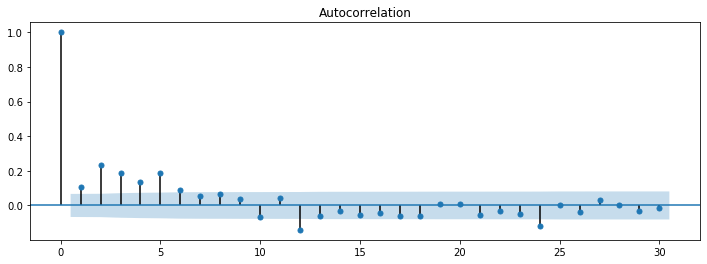

In [146]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (12,4))
acf = plot_acf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show

## Partial Autocorrelation function (PACF) plot

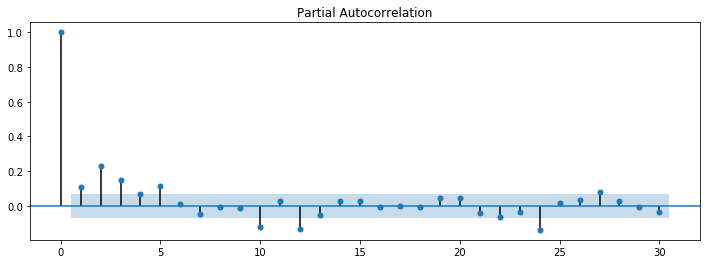

In [147]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (12,4))
pacf = plot_pacf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

## Splitting into training and testing period

In [150]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1] #Here, we drop one value as we had dropped a value due to differencing
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]


## Auto Regression method (AR)

In [151]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order = (12,0,0))
model_fit = model.fit()
print(model_fit.params)

const       0.000466
ar.L1.y     0.060691
ar.L2.y     0.161198
ar.L3.y     0.118646
ar.L4.y     0.090456
ar.L5.y     0.107079
ar.L6.y     0.008286
ar.L7.y    -0.029413
ar.L8.y     0.032450
ar.L9.y     0.006198
ar.L10.y   -0.124660
ar.L11.y    0.047124
ar.L12.y   -0.148533
dtype: float64


### Recover Original Timeseries Forecast

In [152]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [158]:
y_hat_ar['ar_forecast']

1948-02-01    3.901819
1948-03-01    3.960922
1948-04-01    4.082803
1948-05-01    4.188015
1948-06-01    4.210204
                ...   
2019-11-01    5.791459
2019-12-01    5.794161
2020-01-01    5.796863
2020-02-01    5.799567
2020-03-01    5.802272
Freq: MS, Length: 866, dtype: float64

### Plot train, test and forecast data

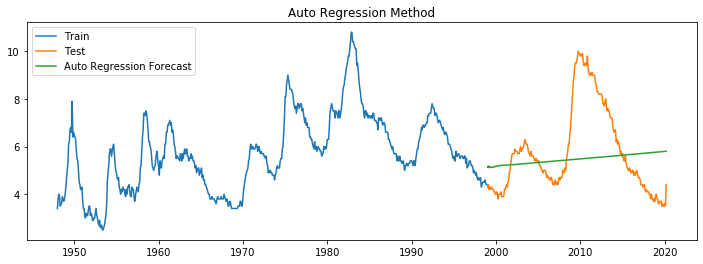

In [153]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label = 'Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [155]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Graded Auto Regressive (AR) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Graded Auto Regressive (AR) Method,1.83,23.62
0,Seasonal Auto Regressive Integrated Moving Ave...,50.27,13.27


### Moving Average method (MA)


In [159]:
train_data_boxcox_diff.head()

Month
1948-02-01    0.111226
1948-03-01    0.051293
1948-04-01   -0.025318
1948-05-01   -0.108214
1948-06-01    0.028171
dtype: float64

In [160]:
model = ARIMA(train_data_boxcox_diff, order = (0, 0, 5))
model_fit = model.fit()
print(model_fit.params)

const      0.000507
ma.L1.y    0.055504
ma.L2.y    0.181882
ma.L3.y    0.123451
ma.L4.y    0.099834
ma.L5.y    0.151700
dtype: float64


### Recover Original Timeseries Forecast

In [161]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Get rid of the differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

#Get rid of box cox transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

In [165]:
y_hat_ma['ma_forecast']

1948-02-01    3.901980
1948-03-01    3.950280
1948-04-01    4.057868
1948-05-01    4.143129
1948-06-01    4.141527
                ...   
2019-11-01    5.921775
2019-12-01    5.924781
2020-01-01    5.927788
2020-02-01    5.930797
2020-03-01    5.933807
Freq: MS, Length: 866, dtype: float64

### Plot train, test and forecast

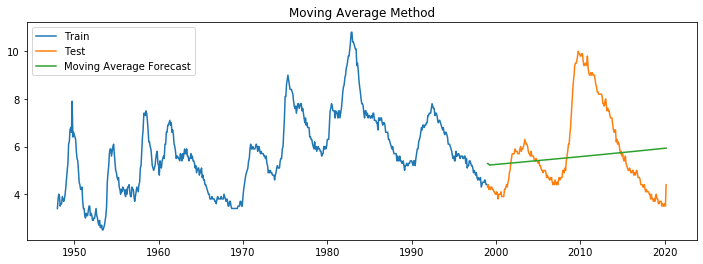

In [162]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label = 'Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [164]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Graded Moving Average (MA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Graded Auto Regressive (AR) Method,1.83,23.62
0,Seasonal Auto Regressive Integrated Moving Ave...,50.27,13.27
0,Moving Average (MA) Method,1.82,24.26
0,Graded Moving Average (MA) Method,1.82,24.26


## Auto Regressive Moving Average (ARMA) Model

In [93]:
model = ARIMA(train_data_boxcox_diff, order = (4,0,3))
model_fit = model.fit()
print(model_fit.params)

const      0.019247
ar.L1.y    0.255058
ar.L2.y    1.094360
ar.L3.y   -0.640848
ar.L4.y   -0.482690
ma.L1.y   -0.806490
ma.L2.y   -0.770900
ma.L3.y    0.984745
dtype: float64


In [94]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

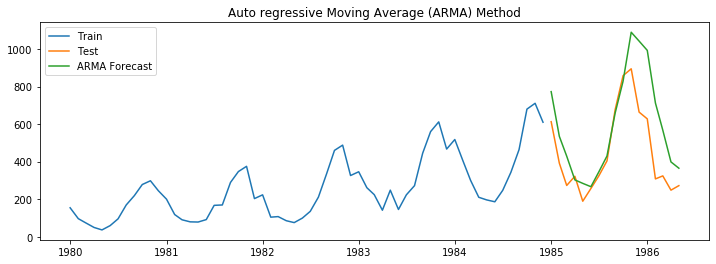

In [95]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label = 'ARMA Forecast')
plt.legend(loc='best')
plt.title('Auto regressive Moving Average (ARMA) Method')
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Moving Average (ARMA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive (AR) Method,213.16,47.15
0,Moving Average (MA) Method,250.19,70.25
0,Moving Average (MA) Method,221.38,56.66
0,Auto Regressive Moving Average (ARMA) Method,195.74,37.49


## Auto Regressive Integrate Moving Average Method

In [167]:
model = ARIMA(train_data_boxcox, order = (12,1,5))
model_fit = model.fit()
print(model_fit.params)

const         0.000505
ar.L1.D.y    -0.109909
ar.L2.D.y     0.669323
ar.L3.D.y     0.498969
ar.L4.D.y    -0.453860
ar.L5.D.y    -0.618486
ar.L6.D.y     0.048635
ar.L7.D.y     0.052036
ar.L8.D.y     0.097894
ar.L9.D.y     0.135364
ar.L10.D.y   -0.043585
ar.L11.D.y    0.005732
ar.L12.D.y   -0.074923
ma.L1.D.y     0.139090
ma.L2.D.y    -0.510214
ma.L3.D.y    -0.369501
ma.L4.D.y     0.509490
ma.L5.D.y     0.687759
dtype: float64


In [168]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

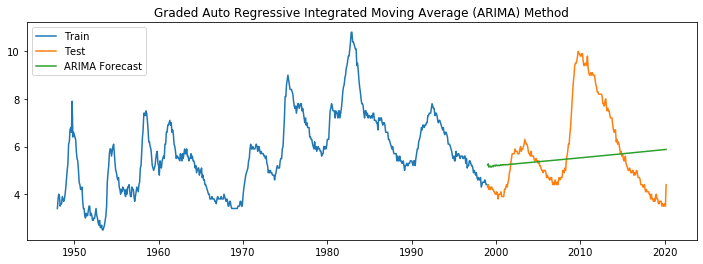

In [169]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label = 'ARIMA Forecast')
plt.legend(loc='best')
plt.title('Graded Auto Regressive Integrated Moving Average (ARIMA) Method')
plt.show()

In [170]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Graded Auto Regressive Integrated Moving Average (ARIMA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Graded Auto Regressive (AR) Method,1.83,23.62
0,Seasonal Auto Regressive Integrated Moving Ave...,50.27,13.27
0,Moving Average (MA) Method,1.82,24.26
0,Graded Moving Average (MA) Method,1.82,24.26
0,Graded Auto Regressive Integrated Moving Avera...,1.83,23.95


## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [171]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order = (2,1,4), seasonal_order=(2,1,4,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.578279
ar.L2       0.171924
ma.L1      -0.543766
ma.L2      -0.061548
ma.L3       0.074199
ma.L4       0.033379
ar.S.L12   -0.881869
ar.S.L24   -0.510142
ma.S.L12   -0.327620
ma.S.L24   -0.464334
ma.S.L36   -0.406189
ma.S.L48    0.261956
sigma2      0.001476
dtype: float64


### Recover original Timeseries forecast

In [172]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

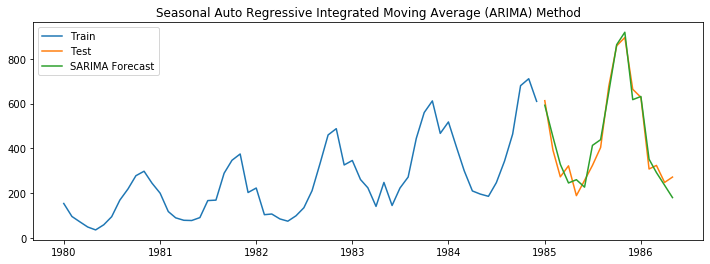

In [121]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label = 'SARIMA Forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average (ARIMA) Method')
plt.show()

In [174]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Graded Seasonal Auto Regressive Integrated Moving Average (ARIMA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Graded Auto Regressive (AR) Method,1.83,23.62
0,Seasonal Auto Regressive Integrated Moving Ave...,50.27,13.27
0,Moving Average (MA) Method,1.82,24.26
0,Graded Moving Average (MA) Method,1.82,24.26
0,Graded Auto Regressive Integrated Moving Avera...,1.83,23.95
0,Seasonal Auto Regressive Integrated Moving Ave...,2.36,23.26
0,Graded Seasonal Auto Regressive Integrated Mov...,2.36,23.26
